In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [37]:
df = pd.read_csv('food.csv')
df.head()

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Ash,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,...,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,BUTTER,"BUTTER,WITH SALT",1001,0,2.11,158,0,0.06,215,19,...,24,576,0.09,2499,684,0.17,0.003,0.0,2.32,7.0
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",1002,0,2.11,158,0,0.06,219,19,...,26,827,0.05,2499,684,0.13,0.003,0.0,2.32,7.0
2,BUTTER OIL,"BUTTER OIL,ANHYDROUS",1003,0,0.00,193,0,0.00,256,22,...,5,2,0.01,3069,840,0.01,0.001,0.0,2.80,8.6
3,CHEESE,"CHEESE,BLUE",1004,0,5.11,74,0,2.34,75,15,...,256,1395,2.66,763,198,1.22,0.166,0.0,0.25,2.4
4,CHEESE,"CHEESE,BRICK",1005,0,3.18,76,0,2.79,94,15,...,136,560,2.60,1080,292,1.26,0.065,0.0,0.26,2.5


# 1. Memilih kolom yang dibutuhkan
---

In [38]:
selected_columns = ['Category', 'Description', 'Data.Protein', 'Data.Fat.Total Lipid', 'Data.Kilocalories', 'Data.Carbohydrate']
filtered_data = df[selected_columns]

In [39]:
# Menampilkan jumlah nilai kosong sebelum diisi
print("Nilai kosong sebelum diisi:")
print(filtered_data.isnull().sum())

# Menampilkan data dengan nilai kosong
print("\nData dengan nilai kosong:")
print(filtered_data[filtered_data.isnull().any(axis=1)])

Nilai kosong sebelum diisi:
Category                0
Description             0
Data.Protein            0
Data.Fat.Total Lipid    0
Data.Kilocalories       0
Data.Carbohydrate       0
dtype: int64

Data dengan nilai kosong:
Empty DataFrame
Columns: [Category, Description, Data.Protein, Data.Fat.Total Lipid, Data.Kilocalories, Data.Carbohydrate]
Index: []


# 2. Menangani nilai kosong (mengisi dengan rata-rata)
---

In [40]:
# Menggunakan .loc untuk mengisi nilai NaN dengan rata-rata pada kolom Data.Protein
filtered_data.loc[:, 'Data.Protein'] = filtered_data['Data.Protein'].fillna(filtered_data['Data.Protein'].mean())
filtered_data.loc[:, 'Data.Fat.Total Lipid'] = filtered_data['Data.Fat.Total Lipid'].fillna(filtered_data['Data.Fat.Total Lipid'].mean())
filtered_data.loc[:, 'Data.Kilocalories'] = filtered_data['Data.Kilocalories'].fillna(filtered_data['Data.Kilocalories'].mean())
filtered_data.loc[:, 'Data.Carbohydrate'] = filtered_data['Data.Carbohydrate'].fillna(filtered_data['Data.Carbohydrate'].mean())

In [41]:
# Menampilkan jumlah nilai kosong setelah diisi
print("\nNilai kosong setelah diisi:")
print(filtered_data.isnull().sum())

# Menampilkan data dengan nilai kosong setelah diisi (seharusnya tidak ada)
print("\nData dengan nilai kosong setelah diisi:")
print(filtered_data[filtered_data.isnull().any(axis=1)])



Nilai kosong setelah diisi:
Category                0
Description             0
Data.Protein            0
Data.Fat.Total Lipid    0
Data.Kilocalories       0
Data.Carbohydrate       0
dtype: int64

Data dengan nilai kosong setelah diisi:
Empty DataFrame
Columns: [Category, Description, Data.Protein, Data.Fat.Total Lipid, Data.Kilocalories, Data.Carbohydrate]
Index: []


# 3. Menghapus data duplikat
---

In [42]:
# Melihat jumlah duplicate value
duplicate = df.duplicated().sum()
print('Jumlah nilai duplikat pada data: ', duplicate)

Jumlah nilai duplikat pada data:  0


##### Tidak ada data duplikat, jadi kita tidak menghapus

## Handling Outlier

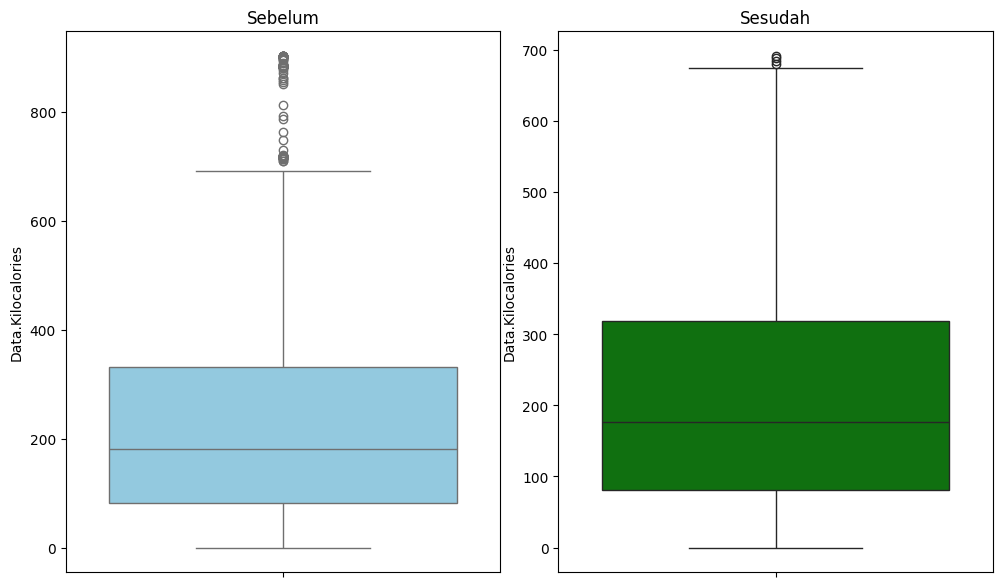

In [43]:
from scipy import stats

# sebelum handling outlier
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
plt.tight_layout()
sns.boxplot(df['Data.Kilocalories'], orient='v', ax=axes[0], color='skyblue')
axes[0].title.set_text("Sebelum")

# Menangani outlier dengan IQR
Q1 = df['Data.Kilocalories'].quantile(0.25)  # Kuartil pertama
Q3 = df['Data.Kilocalories'].quantile(0.75)  # Kuartil ketiga
IQR = Q3 - Q1  # Interquartile Range

# Ambil data di antara Q1 - 1.5*IQR dan Q3 + 1.5*IQR
df = df[(df['Data.Kilocalories'] >= (Q1 - 1.5 * IQR)) &
        (df['Data.Kilocalories'] <= (Q3 + 1.5 * IQR))]

# setelah handling outlier
sns.boxplot(df['Data.Kilocalories'], orient='v', ax=axes[1], color='green')
axes[1].title.set_text("Sesudah")

plt.show()


#4. Future Eng
---

In [44]:
# Mengubah kolom menjadi float sebelum transformasi
filtered_data.loc[:, ['Data.Protein', 'Data.Fat.Total Lipid', 'Data.Kilocalories']] = filtered_data[['Data.Protein', 'Data.Fat.Total Lipid', 'Data.Kilocalories']].astype(float)

# Terapkan MinMaxScaler
scaler = MinMaxScaler()
filtered_data.loc[:, ['Data.Protein', 'Data.Fat.Total Lipid', 'Data.Kilocalories']] = scaler.fit_transform(filtered_data[['Data.Protein', 'Data.Fat.Total Lipid', 'Data.Kilocalories']])

# Menambahkan kolom Low_Calories dan High_Calories berdasarkan Data.Kilocalories yang sudah dinormalisasi
# Menetapkan ambang batas berdasarkan Data.Kilocalories yang sudah dinormalisasi
low_threshold = filtered_data['Data.Kilocalories'].quantile(0.25)  # Ambang batas Q1 (25%)
high_threshold = filtered_data['Data.Kilocalories'].quantile(0.75)  # Ambang batas Q3 (75%)

# Menambahkan kolom Calorie_Label untuk menentukan Low dan High berdasarkan Data.Kilocalories
filtered_data['Calorie_Label'] = filtered_data['Data.Kilocalories'].apply(
    lambda x: 'Low' if x <= low_threshold else 'High'  # Menetapkan dua kategori: Low dan High
)

# Menambahkan kolom Low_Calories dan High_Calories dengan nilai "Low" dan "High"
filtered_data['Low_Calories'] = filtered_data['Data.Kilocalories'].apply(
    lambda x: 'Low' if x <= low_threshold else ''  # "Low" jika kalori <= ambang batas rendah, jika tidak kosong
)

filtered_data['High_Calories'] = filtered_data['Data.Kilocalories'].apply(
    lambda x: 'High' if x > high_threshold else ''  # "High" jika kalori > ambang batas tinggi, jika tidak kosong
)

# Menampilkan distribusi label dan data yang sudah dimodifikasi
print("Distribusi label:")
print(filtered_data['Calorie_Label'].value_counts())

# Menampilkan data dengan kolom tambahan Low_Calories dan High_Calories
print(filtered_data[['Description', 'Data.Kilocalories', 'Low_Calories', 'High_Calories']].head())

Distribusi label:
Calorie_Label
High    5551
Low     1862
Name: count, dtype: int64
                Description  Data.Kilocalories Low_Calories High_Calories
0          BUTTER,WITH SALT           0.794900                       High
1  BUTTER,WHIPPED,WITH SALT           0.794900                       High
2      BUTTER OIL,ANHYDROUS           0.971175                       High
3               CHEESE,BLUE           0.391353                       High
4              CHEESE,BRICK           0.411308                       High


<ipython-input-44-699fbbebac02>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.79490022 0.79490022 0.97117517 ... 0.12416851 0.09977827 0.09866962]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  filtered_data.loc[:, ['Data.Protein', 'Data.Fat.Total Lipid', 'Data.Kilocalories']] = scaler.fit_transform(filtered_data[['Data.Protein', 'Data.Fat.Total Lipid', 'Data.Kilocalories']])


In [45]:
# Menampilkan data yang memiliki nilai "Low" pada kolom Low_Calories
low_calories_data = filtered_data[filtered_data['Low_Calories'] == 'Low']

# Menampilkan hasilnya
print("Data dengan Low Calories:")
print(low_calories_data[['Description', 'Data.Kilocalories', 'Low_Calories']].head())

Data dengan Low Calories:
                                         Description  Data.Kilocalories  \
13  CHEESE,COTTAGE,NONFAT,UNCRMD,DRY,LRG OR SML CURD           0.079823   
15                  CHEESE,COTTAGE,LOWFAT,1% MILKFAT           0.079823   
57        MILK,FILLED,FLUID,W/BLEND OF HYDR VEG OILS           0.069845   
58               MILK,FILLED,FLUID,W/LAURIC ACID OIL           0.069845   
67            MILK SUBSTITUTES,FLUID W/HYDR VEG OILS           0.067627   

   Low_Calories  
13          Low  
15          Low  
57          Low  
58          Low  
67          Low  


# 5. Normalisasi kolom numerik (Protein, Fat, Kalori) menggunakan MinMaxScaler
---

In [46]:
# Mengubah kolom menjadi float sebelum transformasi
filtered_data.loc[:, ['Data.Protein', 'Data.Fat.Total Lipid', 'Data.Kilocalories', 'Data.Carbohydrate']] = filtered_data[['Data.Protein', 'Data.Fat.Total Lipid', 'Data.Kilocalories', 'Data.Carbohydrate']].astype(float)

# Terapkan MinMaxScaler
scaler = MinMaxScaler()
filtered_data.loc[:, ['Data.Protein', 'Data.Fat.Total Lipid', 'Data.Kilocalories', 'Data.Carbohydrate']] = scaler.fit_transform(filtered_data[['Data.Protein', 'Data.Fat.Total Lipid', 'Data.Kilocalories', 'Data.Carbohydrate']])

# Menambahkan kolom Low_Calories dan High_Calories berdasarkan Data.Kilocalories yang sudah dinormalisasi
# Menetapkan ambang batas berdasarkan Data.Kilocalories yang sudah dinormalisasi
low_threshold = filtered_data['Data.Kilocalories'].quantile(0.25)  # Ambang batas Q1 (25%)
high_threshold = filtered_data['Data.Kilocalories'].quantile(0.75)  # Ambang batas Q3 (75%)

# Menambahkan kolom Calorie_Label untuk menentukan Low dan High berdasarkan Data.Kilocalories
filtered_data['Calorie_Label'] = filtered_data['Data.Kilocalories'].apply(
    lambda x: 'Low' if x <= low_threshold else 'High'  # Menetapkan dua kategori: Low dan High
)

# Menambahkan kolom Low_Calories dan High_Calories dengan nilai "Low" dan "High"
filtered_data['Low_Calories'] = filtered_data['Data.Kilocalories'].apply(
    lambda x: 'Low' if x <= low_threshold else ''  # "Low" jika kalori <= ambang batas rendah, jika tidak kosong
)

filtered_data['High_Calories'] = filtered_data['Data.Kilocalories'].apply(
    lambda x: 'High' if x > high_threshold else ''  # "High" jika kalori > ambang batas tinggi, jika tidak kosong
)

# Menampilkan distribusi label dan data yang sudah dimodifikasi
print("Distribusi label:")
print(filtered_data['Calorie_Label'].value_counts())

# Menampilkan data dengan kolom tambahan Low_Calories dan High_Calories
print(filtered_data[['Description', 'Data.Kilocalories', 'Low_Calories', 'High_Calories']].head())


Distribusi label:
Calorie_Label
High    5551
Low     1862
Name: count, dtype: int64
                Description  Data.Kilocalories Low_Calories High_Calories
0          BUTTER,WITH SALT           0.794900                       High
1  BUTTER,WHIPPED,WITH SALT           0.794900                       High
2      BUTTER OIL,ANHYDROUS           0.971175                       High
3               CHEESE,BLUE           0.391353                       High
4              CHEESE,BRICK           0.411308                       High


# Menampilkan dataset yang telah diproses
---

In [47]:
output_path = 'preprocessed_data.csv'
filtered_data.to_csv(output_path, index=False)

In [48]:
print(filtered_data.head())

     Category               Description  Data.Protein  Data.Fat.Total Lipid  \
0      BUTTER          BUTTER,WITH SALT      0.009624                0.8111   
1      BUTTER  BUTTER,WHIPPED,WITH SALT      0.009624                0.8111   
2  BUTTER OIL      BUTTER OIL,ANHYDROUS      0.003170                0.9948   
3      CHEESE               CHEESE,BLUE      0.242301                0.2874   
4      CHEESE              CHEESE,BRICK      0.263134                0.2968   

   Data.Kilocalories  Data.Carbohydrate Calorie_Label Low_Calories  \
0           0.794900             0.0006          High                
1           0.794900             0.0006          High                
2           0.971175             0.0000          High                
3           0.391353             0.0234          High                
4           0.411308             0.0279          High                

  High_Calories  
0          High  
1          High  
2          High  
3          High  
4          Hig

# Supervised Learning
---

## Kilocalories sebagai target

Mean Absolute Error (MAE): 0.05244474219174096
Mean Squared Error (MSE): 0.0035740120271958004
Root Mean Squared Error (RMSE): 0.05978304130098937
R-Squared: 0.9012392223336392


<ipython-input-77-85f21a4f6f86>:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color="red")


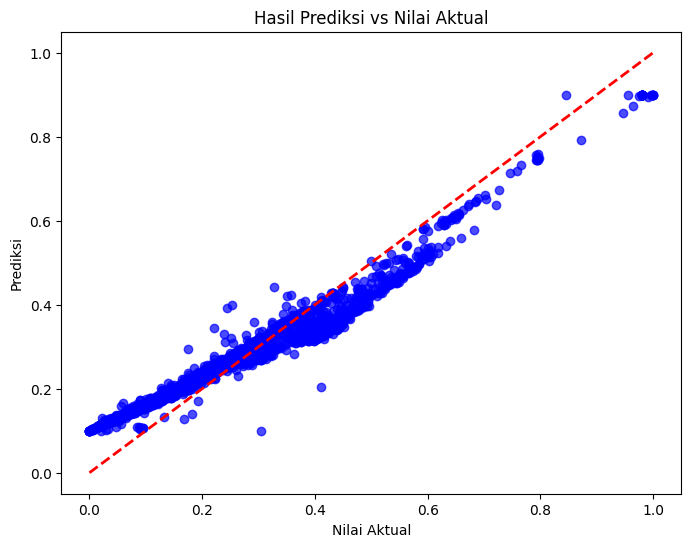

In [77]:
df = pd.read_csv('preprocessed_data.csv')

# Mengambil fitur dan target
X = df[['Data.Protein', 'Data.Fat.Total Lipid', 'Data.Carbohydrate']]  # Fitur
y = df['Data.Kilocalories']  # Target

# Normalisasi data fitur menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)  # Normalisasi X

# Membagi data ke dalam train set dan test set
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Membuat model SVR dengan kernel linear
svm = SVR(kernel="linear")
svm.fit(X_train, y_train)  # Latih model dengan data training

# Prediksi data test
y_pred = svm.predict(X_test)

# Evaluasi model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-Squared:", r2)

# Visualisasi hasil prediksi vs nilai aktual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color="red")
plt.title("Hasil Prediksi vs Nilai Aktual")
plt.xlabel("Nilai Aktual")
plt.ylabel("Prediksi")
plt.show()

## Metode Evaluasi dalam Klasifikasi

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X = df[['Data.Protein', 'Data.Fat.Total Lipid', 'Data.Carbohydrate']]  # Fitur
y = df['Data.Kilocalories']  # Target

# Normalisasi data fitur menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)  # Normalisasi X

# Membagi data ke dalam train set dan test set
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Buat objek regressor SVM dengan kernel linear
svm = SVR(kernel="linear")  # Gunakan SVR untuk regresi
svm.fit(X_train, y_train)  # Latih regressor dengan data train

# Prediksi data test
y_pred = svm.predict(X_test)

# Evaluasi hasil prediksi menggunakan metrik regresi
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-Squared :", r2_score(y_test, y_pred))

MAE : 0.05244474219174096
MSE : 0.0035740120271958004
RMSE : 0.05978304130098937
R-Squared : 0.9012392223336392


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7413 entries, 0 to 7412
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Category              7413 non-null   object 
 1   Description           7413 non-null   object 
 2   Data.Protein          7413 non-null   float64
 3   Data.Fat.Total Lipid  7413 non-null   float64
 4   Data.Kilocalories     7413 non-null   float64
 5   Data.Carbohydrate     7413 non-null   float64
 6   Calorie_Label         7413 non-null   object 
 7   Low_Calories          1862 non-null   object 
 8   High_Calories         1852 non-null   object 
dtypes: float64(4), object(5)
memory usage: 521.4+ KB


Train SVR

Mean Absolute Error (MAE): 1.1428718582486375
Mean Squared Error (MSE): 2.3764457204679683
Root Mean Squared Error (RMSE): 1.5415724830406023
R-Squared: 0.9754895313980784
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best hyperparameters found:  {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best Model - MAE: 1.1429068865402696
Best Model - MSE: 2.3780977639937197
Best Model - RMSE: 1.5421082205843142
Best Model - R-Squared: 0.9754724923550158


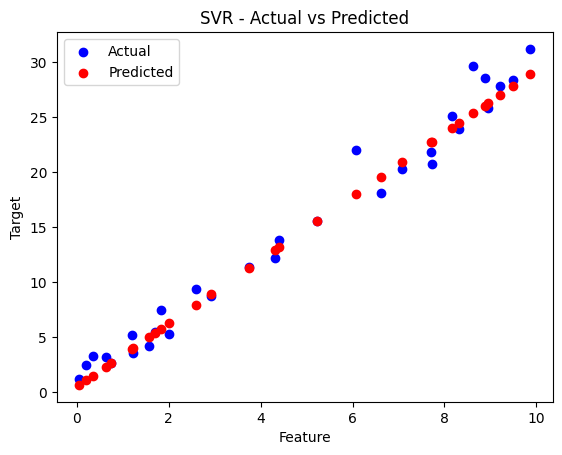

In [53]:
from sklearn.model_selection import GridSearchCV
# Generate some data (you can replace this with your actual dataset)
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature (e.g., 'Protein' or 'Fat')
y = 3 * X.squeeze() + np.random.randn(100) * 2  # Target (e.g., 'Calories')

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the SVR model
svr = SVR(kernel='linear')  # You can change the kernel to 'linear', 'poly', etc.

# Fit the model to the training data
svr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared: {r2}")

# Hyperparameter Tuning using GridSearchCV
# Define the hyperparameters grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],  # Degree is relevant only for the 'poly' kernel
}

# Set up GridSearchCV
grid_search = GridSearchCV(svr, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters found: ", grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the tuned model
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Model - MAE: {mae_best}")
print(f"Best Model - MSE: {mse_best}")
print(f"Best Model - RMSE: {rmse_best}")
print(f"Best Model - R-Squared: {r2_best}")

# Plotting the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_best, color='red', label='Predicted')
plt.title('SVR - Actual vs Predicted')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Parameter grid (lebih kecil untuk eksperimen cepat)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

# Randomized Search for Hyperparameters
random_search = RandomizedSearchCV(SVR(), param_distributions=param_grid, n_iter=10, cv=5, verbose=2, n_jobs=-1)
random_search.fit(X_train, y_train)

# Evaluasi dengan model terbaik
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Best Model - R-Squared: ", r2_score(y_test, y_pred_best))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Model - R-Squared:  0.9113502843362857


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [69]:
# Number of rows in the dataset
print("Number of rows (data points):", len(df))

Number of rows (data points): 7413


Mean Absolute Error (MAE): 0.05244474219174096
Mean Squared Error (MSE): 0.0035740120271958004
Root Mean Squared Error (RMSE): 0.05978304130098937
R-Squared: 0.9012392223336392


<ipython-input-78-244f09c8db9c>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color="red")


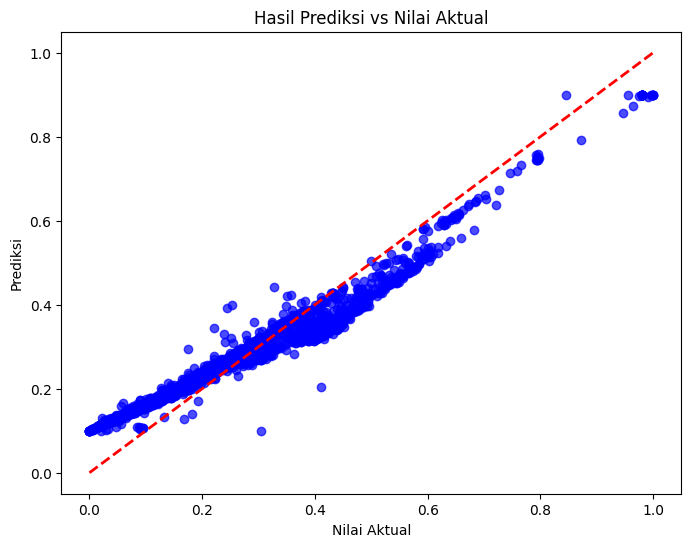

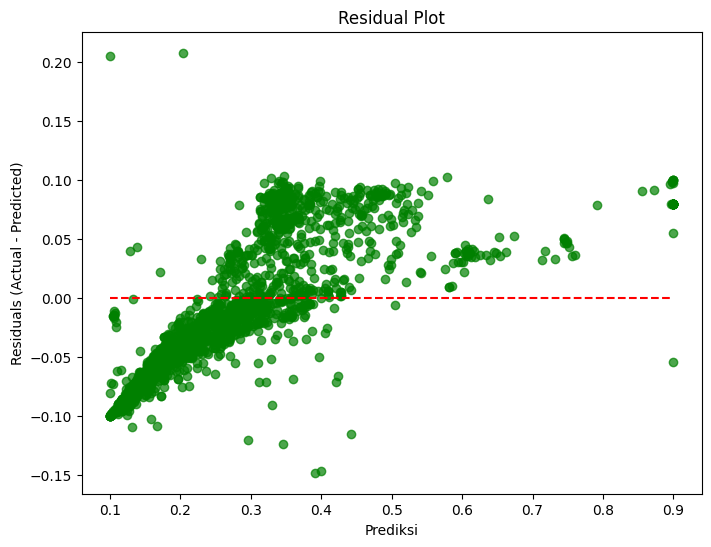

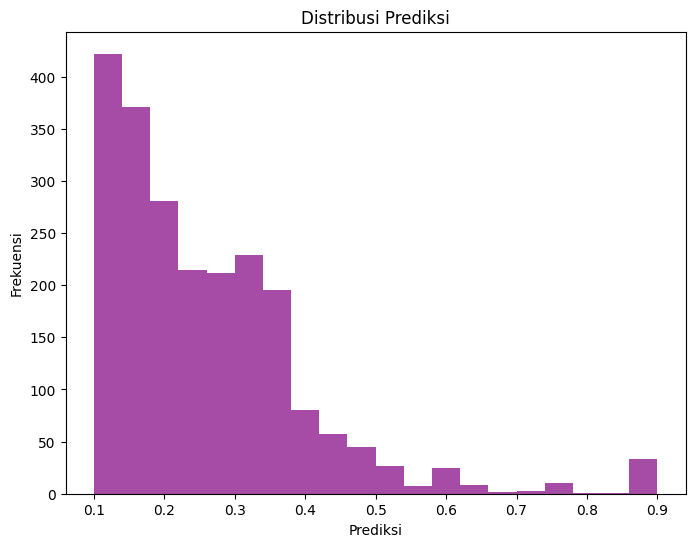

In [78]:
# Prediksi data test
y_pred = svm.predict(X_test)

# Evaluasi model menggunakan MAE, MSE, RMSE, dan R2
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-Squared:", r2)

# Visualisasi hasil prediksi vs nilai aktual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color="red")
plt.title("Hasil Prediksi vs Nilai Aktual")
plt.xlabel("Nilai Aktual")
plt.ylabel("Prediksi")
plt.show()

# Visualisasi residual (selisih antara nilai aktual dan prediksi)
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color="green")
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.title("Residual Plot")
plt.xlabel("Prediksi")
plt.ylabel("Residuals (Actual - Predicted)")
plt.show()

# Histogram dari nilai prediksi
plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=20, color='purple', alpha=0.7)
plt.title("Distribusi Prediksi")
plt.xlabel("Prediksi")
plt.ylabel("Frekuensi")
plt.show()


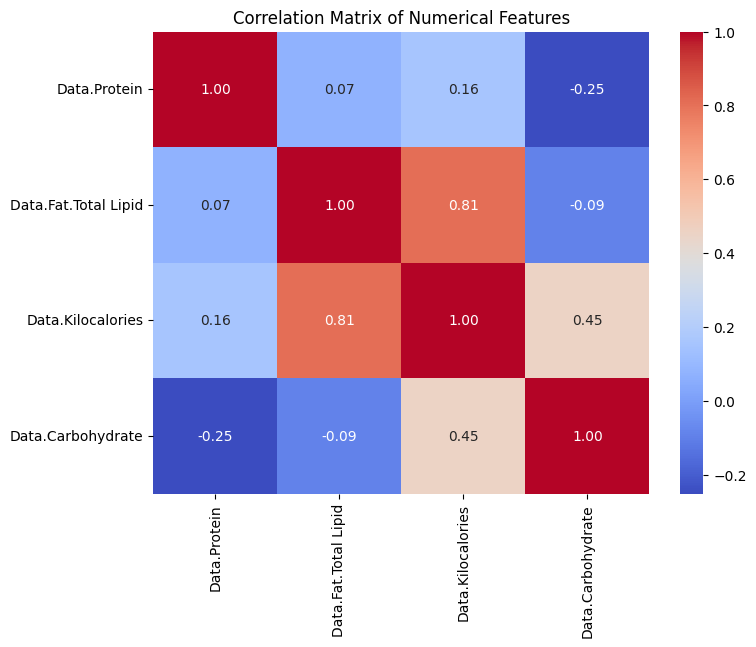

In [79]:
# prompt: buatkan saya tampilan korelasinya

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed data
df = pd.read_csv('preprocessed_data.csv')

# Calculate the correlation matrix
correlation_matrix = df[['Data.Protein', 'Data.Fat.Total Lipid', 'Data.Kilocalories', 'Data.Carbohydrate']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [1]:
# Pastikan model Anda sudah didefinisikan dan ditraining sebelumnya
import joblib

# Simpan model
joblib.dump(model, 'E:/template_PA_Mobile/api/Synapse/api/model/garden/PA.joblib')



NameError: name 'model' is not defined